# Netflix Data Analysis

This notebook explores the Netflix shows dataset to uncover trends and patterns in Netflix's content library.

## Key Questions:
1. How has Netflix's content library grown over time?
2. What is the distribution between Movies and TV Shows?
3. Which countries produce the most content on Netflix?
4. What are the most common genres?

## Data Overview
The dataset contains information about TV shows and movies available on Netflix, including:
- Type (Movie/TV Show)
- Title
- Director
- Cast
- Country of production
- Release year
- Rating
- Duration
- Listed genres
- Description

In [1]:
# These lines tell Python to load the tools we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default seaborn style for prettier plots
sns.set()  # This is the correct way to use seaborn styling

In [2]:
# This loads our Netflix data file into a table called 'df'
df = pd.read_csv('netflix_titles.csv')

# This shows the first 5 rows of our data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# This tells us how big our dataset is (rows, columns)
print(f"Dataset size: {df.shape[0]} rows and {df.shape[1]} columns")

# This shows the column names and data types
df.info()

Dataset size: 8807 rows and 12 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# This checks if we're missing any information
missing_data = df.isnull().sum()

# Show columns with missing values
print("Missing values in each column:")
for column, count in missing_data.items():
    if count > 0:
        percentage = (count / len(df)) * 100
        print(f"{column}: {count} values missing ({percentage:.2f}%)")

Missing values in each column:
director: 2634 values missing (29.91%)
cast: 825 values missing (9.37%)
country: 831 values missing (9.44%)
date_added: 10 values missing (0.11%)
rating: 4 values missing (0.05%)
duration: 3 values missing (0.03%)


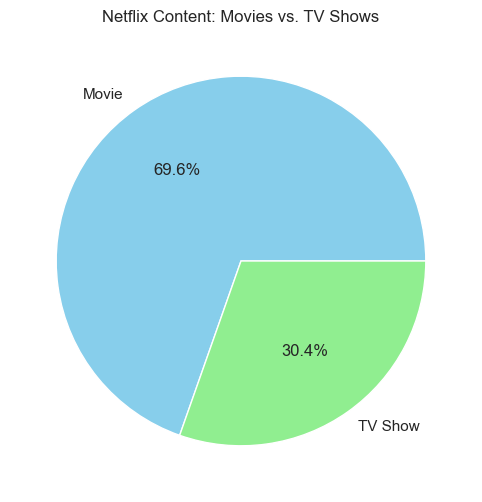

In [5]:
# Create a pie chart showing the distribution of content type (Movie vs. TV Show)
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Netflix Content: Movies vs. TV Shows')
plt.ylabel('')  # Hide the y-label for cleaner look
plt.show()

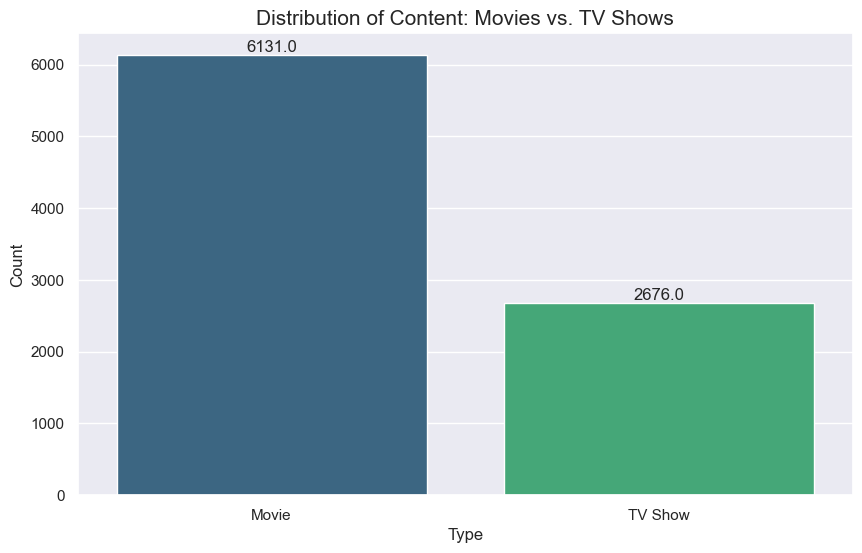

In [8]:
# Count of shows by type (Movie vs. TV Show)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', hue='type', data=df, palette='viridis', legend=False)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
               (p.get_x() + p.get_width()/2., p.get_height()), 
               ha='center', va='bottom')
    
plt.title('Distribution of Content: Movies vs. TV Shows', fontsize=15)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<Figure size 1400x700 with 0 Axes>

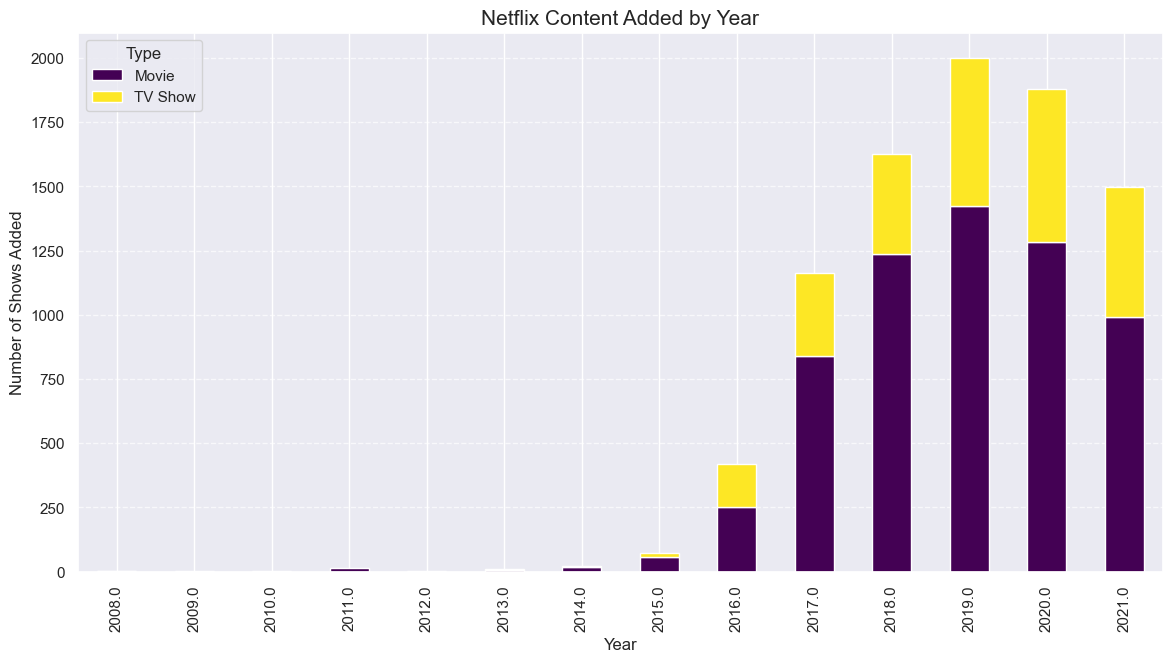

In [7]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year

# Count content by year
yearly_content = df.groupby(['year_added', 'type']).size().unstack()

# Plot content added by year
plt.figure(figsize=(14, 7))
yearly_content.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Netflix Content Added by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Shows Added', fontsize=12)
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

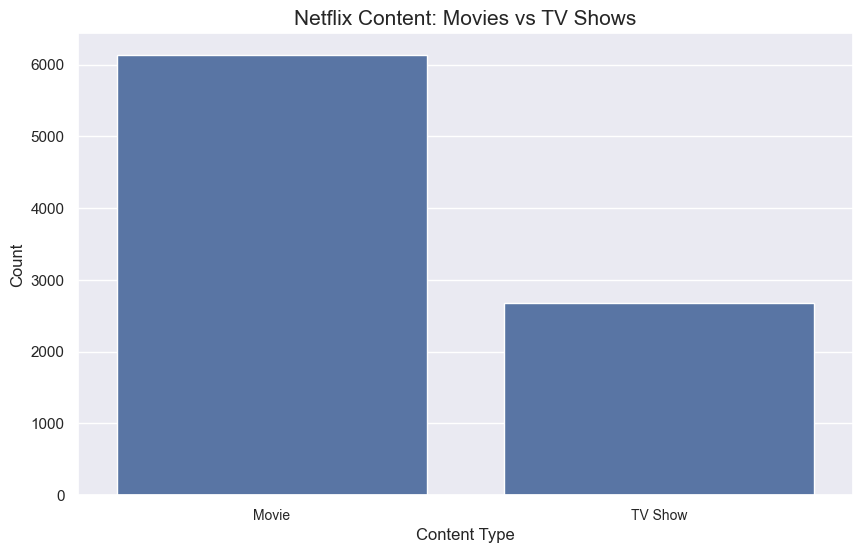

In [9]:
# Count movies vs TV shows
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Netflix Content: Movies vs TV Shows', fontsize=15)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.savefig('content_type.png')  # Saves the chart as an image
plt.show()

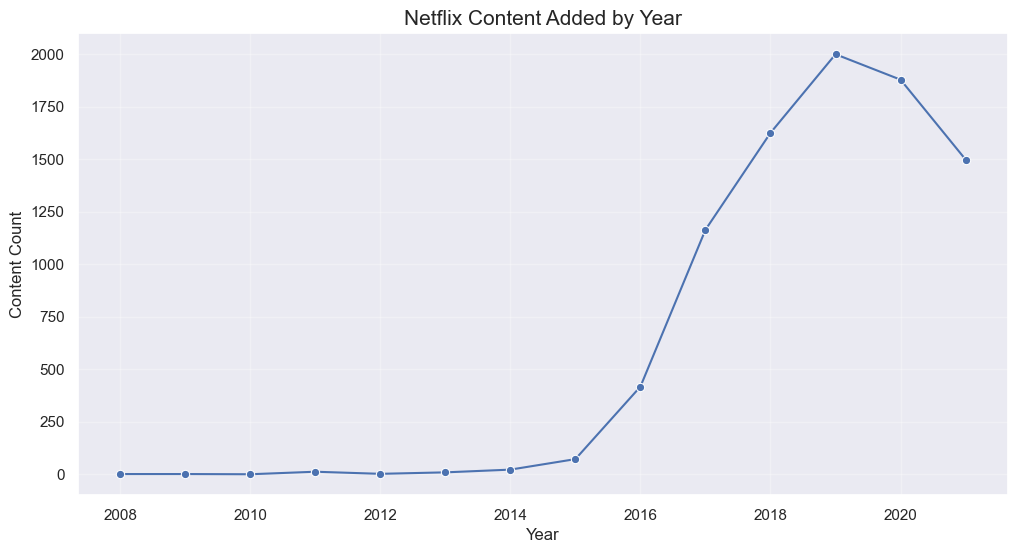

In [10]:
# First convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and create a count by year
df['year_added'] = df['date_added'].dt.year
yearly_content = df.groupby('year_added').size().reset_index(name='count')

# Plot content added by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_added', y='count', data=yearly_content, marker='o')
plt.title('Netflix Content Added by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('yearly_additions.png')
plt.show()

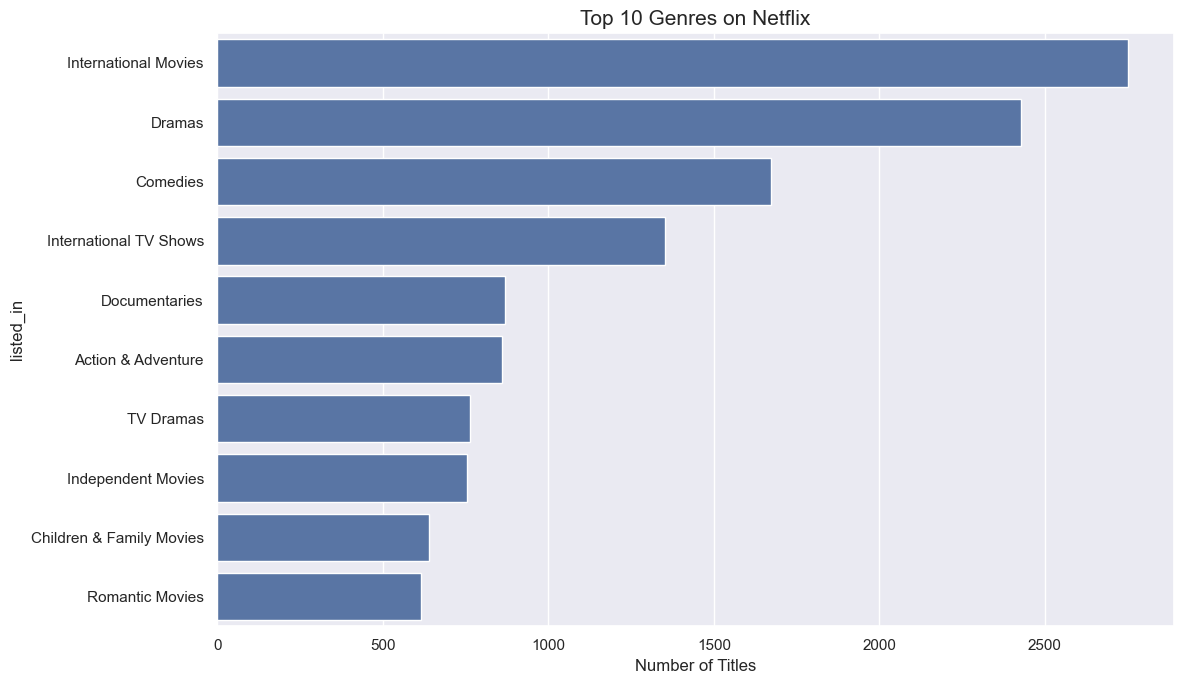

In [11]:
# Extract all genres
genres = df['listed_in'].str.split(', ').explode()

# Count frequency of each genre
genre_counts = genres.value_counts().head(10)

# Plot top 10 genres
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres on Netflix', fontsize=15)
plt.xlabel('Number of Titles', fontsize=12)
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()

In [12]:
import sqlite3

# Create a connection to a SQLite database
conn = sqlite3.connect('netflix_data.db')

# Save the dataframe to a SQL table
df.to_sql('netflix_titles', conn, if_exists='replace', index=False)

# Verify the data was loaded
print(f"Rows in SQL table: {pd.read_sql('SELECT COUNT(*) FROM netflix_titles', conn).iloc[0, 0]}")

# Example SQL query - Top 10 countries producing content
query = """
SELECT country, COUNT(*) as title_count
FROM netflix_titles
WHERE country IS NOT NULL AND country != ''
GROUP BY country
ORDER BY title_count DESC
LIMIT 10
"""

top_countries = pd.read_sql(query, conn)
print("Top 10 countries producing Netflix content:")
top_countries

Rows in SQL table: 8807
Top 10 countries producing Netflix content:


,country,title_count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


## Summary of Findings

From this exploratory analysis of Netflix content, we can conclude:

1. Movies make up the majority of Netflix's content library compared to TV Shows.
2. Netflix significantly increased its content additions between 2015-2020.
3. The United States, India, and the UK are the top countries producing content for Netflix.
4. Documentaries, Stand-Up Comedy, and Dramas are among the most common genres.

## Next Steps for Analysis

Future analysis could explore:
- Content trends by country and region
- Rating distributions across different genres
- Actor/director networks and collaborations
- Text analysis of descriptions to identify popular themes